**QMNIST**

In [1]:
# import the necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Load Fashion QMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform) # load the training data
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform) # load the test data

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

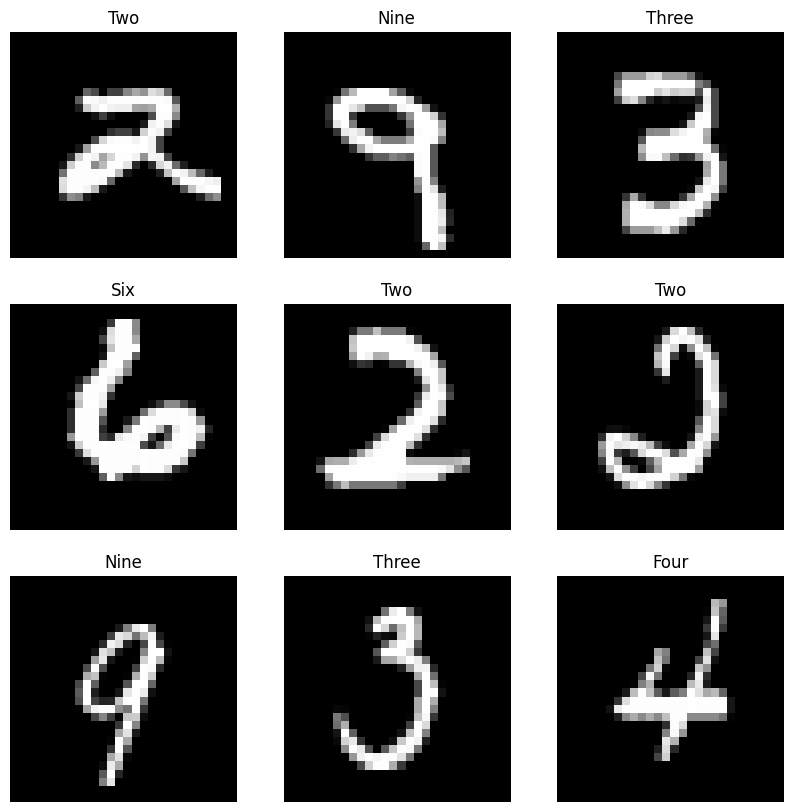

In [3]:
# labels for the data
labels_map = {
    0: "Zero",
    1: "One",
    2: "Two",
    3: "Three",
    4: "Four",
    5: "Five",
    6: "Six",
    7: "Seven",
    8: "Eight",
    9: "Nine",
}

# display the training data
figure = plt.figure(figsize=(10, 10))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

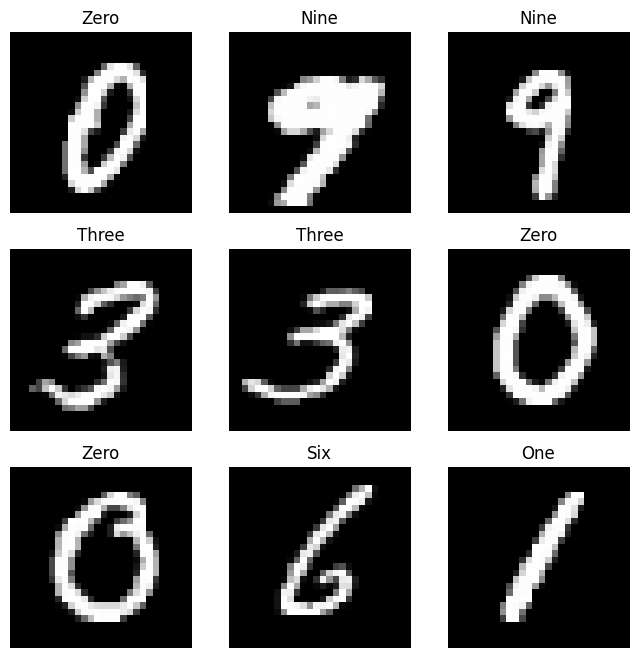

In [4]:
# display the test data
figure = plt.figure(figsize = (8,8))
cols, rows = 3, 3
for i in range(1, cols * rows +1):
    sample = torch.randint(len(test_dataset), size = (1,)).item()
    img, label = test_dataset[sample]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

**Build a simple neural network**

In [5]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

In [6]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0078081268072128
Epoch 1, Batch 200, Loss: 0.4445273208618164
Epoch 1, Batch 300, Loss: 0.3736154310405254
Epoch 1, Batch 400, Loss: 0.3540759745240212
Epoch 1, Batch 500, Loss: 0.3093124395608902
Epoch 1, Batch 600, Loss: 0.29362605735659597
Epoch 1, Batch 700, Loss: 0.26410249635577204
Epoch 1, Batch 800, Loss: 0.25555748887360097
Epoch 1, Batch 900, Loss: 0.22046166740357875
Epoch 2, Batch 100, Loss: 0.22045615889132023
Epoch 2, Batch 200, Loss: 0.21053031105548142
Epoch 2, Batch 300, Loss: 0.18405186086893083
Epoch 2, Batch 400, Loss: 0.19778440590947866
Epoch 2, Batch 500, Loss: 0.18036663107573986
Epoch 2, Batch 600, Loss: 0.1782092772424221
Epoch 2, Batch 700, Loss: 0.15621111992746592
Epoch 2, Batch 800, Loss: 0.15975962173193692
Epoch 2, Batch 900, Loss: 0.16263387175276875
Epoch 3, Batch 100, Loss: 0.14689409663900732
Epoch 3, Batch 200, Loss: 0.1408161872252822
Epoch 3, Batch 300, Loss: 0.13294525085017084
Epoch 3, Batch 400, Loss: 0.1426664897240

In [7]:
# Evaluate the model on test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total * 100}%')

Accuracy on test set: 96.34166666666667%


In [8]:
# Evaluate the model on training data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total * 100}%')

Accuracy on train set: 97.28333333333333%


In [9]:
# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

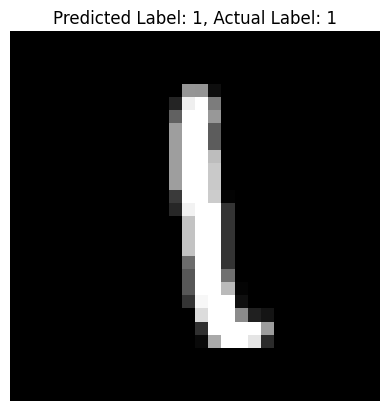

In [12]:
import random
import matplotlib.pyplot as plt

# Get a random index for the test data
random_index = random.randint(0, len(test_dataset) - 1)

# Get the image and label at the random index
image, label = test_dataset[random_index]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Assuming 'predictions' contains the predicted labels for the test data
predicted_label = predictions[random_index]

# Display the image with both predicted and actual labels
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label}, Actual Label: {label}')
plt.axis('off')
plt.show()


Hypothesiz Changes:


Modification 1: We add another dense layer of 128 nodes.

Effect: Adding another layer makes the network more dense. This has potential positive and negative effects. A deeper network enhances its capacity to learn complex representations. It can capture more finer details in the input data and also better represent the underlying function.

But there is risk of the network overfitting.


In [13]:
class MLP1(nn.Module):
    def __init__(self):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)  # New layer with 128 nodes
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the neural network
model1 = MLP1()


In [14]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001, weight_decay=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.223159981071949
Epoch 1, Batch 200, Loss: 0.49247067511081694
Epoch 1, Batch 300, Loss: 0.39555924966931344
Epoch 1, Batch 400, Loss: 0.3605233058333397
Epoch 1, Batch 500, Loss: 0.328639871776104
Epoch 1, Batch 600, Loss: 0.30850917562842367
Epoch 1, Batch 700, Loss: 0.27073191426694393
Epoch 1, Batch 800, Loss: 0.2454815786331892
Epoch 1, Batch 900, Loss: 0.2570173402130604
Epoch 2, Batch 100, Loss: 0.2104510485380888
Epoch 2, Batch 200, Loss: 0.22725911900401116
Epoch 2, Batch 300, Loss: 0.2185006707161665
Epoch 2, Batch 400, Loss: 0.1933768643438816
Epoch 2, Batch 500, Loss: 0.1867717767879367
Epoch 2, Batch 600, Loss: 0.1741530806571245
Epoch 2, Batch 700, Loss: 0.1881299914047122
Epoch 2, Batch 800, Loss: 0.17224256075918676
Epoch 2, Batch 900, Loss: 0.16450847901403903
Epoch 3, Batch 100, Loss: 0.18292904622852801
Epoch 3, Batch 200, Loss: 0.1464189210534096
Epoch 3, Batch 300, Loss: 0.1551895483583212
Epoch 3, Batch 400, Loss: 0.15846358999609947
Epo

In [15]:
# Evaluate the model
model1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total * 100}%')

Accuracy on test set: 95.85333333333334%


In [16]:
# Evaluate the model
model1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total * 100}%')

Accuracy on train set: 96.73%


In [17]:
# Evaluate the model and store predictions
model1.eval()
predictions1 = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions1.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

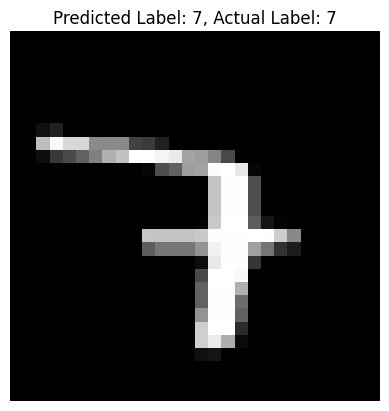

In [18]:
import random
import matplotlib.pyplot as plt

# Get a random index for the test data
random_index = random.randint(0, len(test_dataset) - 1)

# Get the image and label at the random index
image, label = test_dataset[random_index]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Assuming 'predictions' contains the predicted labels for the test data
predicted_label1 = predictions1[random_index]

# Display the image with both predicted and actual labels
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label1}, Actual Label: {label}')
plt.axis('off')
plt.show()

Though we assumed adding another dense layer will increase the performance of the model drastically, we observed that there was no significant improvement in the performance of the model.

# **Experimentation.**

1. Model with SGD Optimizer

In [19]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

In [20]:
model2 = MLP()
optimizer2 = optim.SGD(model2.parameters(), lr=0.01, weight_decay=0.01)
criterion2 = nn.CrossEntropyLoss()


In [21]:
# Train the neural network
num_epochs = 7
for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer2.zero_grad()
        outputs = model2(inputs)
        loss = criterion2(outputs, labels)
        loss.backward()
        optimizer2.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 2.2231294226646425
Epoch 1, Batch 200, Loss: 1.9547537887096404
Epoch 1, Batch 300, Loss: 1.4921201515197753
Epoch 1, Batch 400, Loss: 1.0600629138946533
Epoch 1, Batch 500, Loss: 0.8441450011730194
Epoch 1, Batch 600, Loss: 0.7064767211675644
Epoch 1, Batch 700, Loss: 0.6198024389147758
Epoch 1, Batch 800, Loss: 0.5669436356425286
Epoch 1, Batch 900, Loss: 0.5223508158326149
Epoch 2, Batch 100, Loss: 0.4771599408984184
Epoch 2, Batch 200, Loss: 0.4626170624792576
Epoch 2, Batch 300, Loss: 0.4353434519469738
Epoch 2, Batch 400, Loss: 0.4225610522925854
Epoch 2, Batch 500, Loss: 0.40648702904582024
Epoch 2, Batch 600, Loss: 0.3982182011008263
Epoch 2, Batch 700, Loss: 0.4051629512012005
Epoch 2, Batch 800, Loss: 0.3900204974412918
Epoch 2, Batch 900, Loss: 0.3865311828255653
Epoch 3, Batch 100, Loss: 0.37845958486199377
Epoch 3, Batch 200, Loss: 0.3605403837561607
Epoch 3, Batch 300, Loss: 0.3611134731769562
Epoch 3, Batch 400, Loss: 0.3634296467900276
Epoch 3,

In [23]:
# Evaluate the model test
model2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total * 100}%')


# Evaluate the model train
model2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total * 100}%')

Accuracy on test set: 91.88333333333333%
Accuracy on train set: 92.22833333333334%


In [24]:
# Evaluate the model and store predictions
model2.eval()
predictions2 = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions2.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

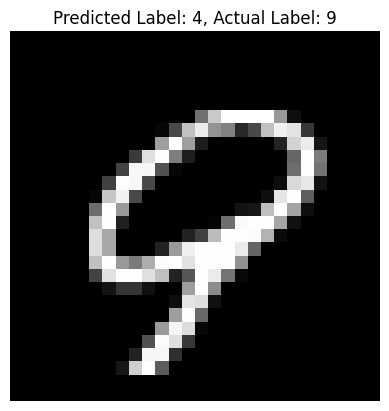

In [25]:
import random
import matplotlib.pyplot as plt

# Get a random index for the test data
random_index = random.randint(0, len(test_dataset) - 1)

# Get the image and label at the random index
image, label = test_dataset[random_index]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Assuming 'predictions' contains the predicted labels for the test data
predicted_label1 = predictions2[random_index]

# Display the image with both predicted and actual labels
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label1}, Actual Label: {label}')
plt.axis('off')
plt.show()


1. We observe a drop in accuracy when we use SGD in Optimizer

**2. Model with RMSProp Optimizer**

In [26]:
model3 = MLP()
optimizer3 = optim.RMSprop(model3.parameters(), lr=0.001)
criterion3 = nn.CrossEntropyLoss()


In [27]:
# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model3.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer3.zero_grad()
        outputs = model3(inputs)
        loss = criterion3(outputs, labels)
        loss.backward()
        optimizer3.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0089119270443916
Epoch 1, Batch 200, Loss: 0.45265973061323167
Epoch 1, Batch 300, Loss: 0.3828606003522873
Epoch 1, Batch 400, Loss: 0.3629955299198627
Epoch 1, Batch 500, Loss: 0.32737397149205205
Epoch 1, Batch 600, Loss: 0.29125195160508155
Epoch 1, Batch 700, Loss: 0.2713908252120018
Epoch 1, Batch 800, Loss: 0.2734949107468128
Epoch 1, Batch 900, Loss: 0.25069018378853797
Epoch 2, Batch 100, Loss: 0.20867161422967911
Epoch 2, Batch 200, Loss: 0.2096816958487034
Epoch 2, Batch 300, Loss: 0.20307319656014441
Epoch 2, Batch 400, Loss: 0.18823393870145083
Epoch 2, Batch 500, Loss: 0.18501923456788064
Epoch 2, Batch 600, Loss: 0.17437277156859637
Epoch 2, Batch 700, Loss: 0.18075346235185863
Epoch 2, Batch 800, Loss: 0.16382974822074176
Epoch 2, Batch 900, Loss: 0.17251726847141982
Epoch 3, Batch 100, Loss: 0.13953718204051258
Epoch 3, Batch 200, Loss: 0.13751526277512313
Epoch 3, Batch 300, Loss: 0.14903538513928652
Epoch 3, Batch 400, Loss: 0.122878946363

In [28]:
# Evaluate the model test
model3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total *100}%')


# Evaluate the model train
model3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total *100}%')

Accuracy on test set: 96.21333333333332%
Accuracy on train set: 97.33333333333334%


In [29]:
# Evaluate the model and store predictions
model3.eval()
predictions3 = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions3.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

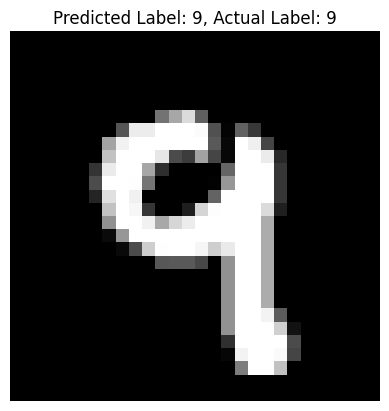

In [30]:
import random
import matplotlib.pyplot as plt

# Get a random index for the test data
random_index = random.randint(0, len(test_dataset) - 1)

# Get the image and label at the random index
image, label = test_dataset[random_index]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Assuming 'predictions' contains the predicted labels for the test data
predicted_label1 = predictions3[random_index]

# Display the image with both predicted and actual labels
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label1}, Actual Label: {label}')
plt.axis('off')
plt.show()


There is an increase in accuracy of the test data and a slight increase in the accuracy on train data when we use RMSProp optimizer

**3. Model with Dropout**

In [31]:
# Define the neural network architecture
class MLP4(nn.Module):
    def __init__(self):
        super(MLP4, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2)  # Dropout layer with 20% dropout rate

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after the first hidden layer
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout after the second hidden layer
        x = self.fc3(x)
        return x

# Initialize the neural network
model4 = MLP4()


In [32]:
# Define the loss function and optimizer
criterion4 = nn.CrossEntropyLoss()
optimizer4 = optim.SGD(model4.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model4.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer4.zero_grad()
        outputs = model4(inputs)
        loss = criterion4(outputs, labels)
        loss.backward()
        optimizer4.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 2.308173315525055
Epoch 1, Batch 200, Loss: 2.2905357766151426
Epoch 1, Batch 300, Loss: 2.2776666259765626
Epoch 1, Batch 400, Loss: 2.2660988640785216
Epoch 1, Batch 500, Loss: 2.2532552313804626
Epoch 1, Batch 600, Loss: 2.2364732885360716
Epoch 1, Batch 700, Loss: 2.2214380049705507
Epoch 1, Batch 800, Loss: 2.205617759227753
Epoch 1, Batch 900, Loss: 2.181347768306732
Epoch 2, Batch 100, Loss: 2.1493712043762208
Epoch 2, Batch 200, Loss: 2.1238602113723757
Epoch 2, Batch 300, Loss: 2.0976310086250307
Epoch 2, Batch 400, Loss: 2.067836184501648
Epoch 2, Batch 500, Loss: 2.03838769197464
Epoch 2, Batch 600, Loss: 2.005198764801025
Epoch 2, Batch 700, Loss: 1.9662166011333466
Epoch 2, Batch 800, Loss: 1.9249723637104035
Epoch 2, Batch 900, Loss: 1.8853063213825225
Epoch 3, Batch 100, Loss: 1.8151460635662078
Epoch 3, Batch 200, Loss: 1.7619012081623078
Epoch 3, Batch 300, Loss: 1.7248380494117737
Epoch 3, Batch 400, Loss: 1.6890446734428406
Epoch 3, Batch 50

In [34]:
# Evaluate the model test
model4.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total *100}%')


# Evaluate the model train
model4.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total *100}%')

Accuracy on test set: 80.70166666666667%
Accuracy on train set: 80.71666666666667%


In [35]:
# Evaluate the model and store predictions
model4.eval()
predictions4 = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model4(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions4.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

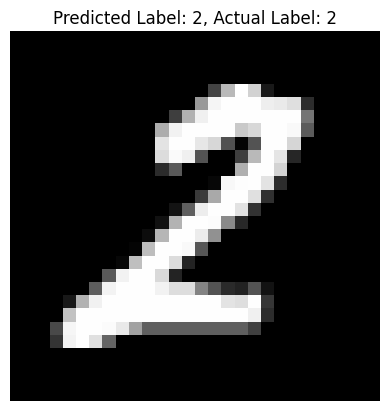

In [36]:
import random
import matplotlib.pyplot as plt

# Get a random index for the test data
random_index = random.randint(0, len(test_dataset) - 1)

# Get the image and label at the random index
image, label = test_dataset[random_index]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Assuming 'predictions' contains the predicted labels for the test data
predicted_label1 = predictions4[random_index]

# Display the image with both predicted and actual labels
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label1}, Actual Label: {label}')
plt.axis('off')
plt.show()


**4. We increase the number of nodes, use dropout and LeakyRelu**

In [39]:
import torch.nn.functional as F

class MLP5(nn.Module):
    def __init__(self):
        super(MLP5, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2)  # Add dropout layer with 20% dropout rate

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.leaky_relu(self.fc1(x), negative_slope=0.01)  # LeakyReLU activation
        x = self.dropout(x)  # Apply dropout
        x = F.leaky_relu(self.fc2(x), negative_slope=0.01)
        x = F.leaky_relu(self.fc3(x), negative_slope=0.01)
        x = self.fc4(x)
        return x

# Initialize the neural network
model5 = MLP5()


criterion5 = nn.CrossEntropyLoss()

# Initialize the optimizer (Adam)
optimizer5 = optim.Adam(model5.parameters(), lr=0.01)

In [40]:
# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model5.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer5.zero_grad()
        outputs = model5(inputs)
        loss = criterion5(outputs, labels)
        loss.backward()
        optimizer5.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.1956474733352662
Epoch 1, Batch 200, Loss: 0.6214483356475831
Epoch 1, Batch 300, Loss: 0.5199390372633934
Epoch 1, Batch 400, Loss: 0.47924466013908384
Epoch 1, Batch 500, Loss: 0.444323753118515
Epoch 1, Batch 600, Loss: 0.4527487637102604
Epoch 1, Batch 700, Loss: 0.43174673974514005
Epoch 1, Batch 800, Loss: 0.39417280212044714
Epoch 1, Batch 900, Loss: 0.408457308113575
Epoch 2, Batch 100, Loss: 0.3912648403644562
Epoch 2, Batch 200, Loss: 0.42193850949406625
Epoch 2, Batch 300, Loss: 0.35044963523745537
Epoch 2, Batch 400, Loss: 0.4120477247238159
Epoch 2, Batch 500, Loss: 0.3771881595253944
Epoch 2, Batch 600, Loss: 0.38411304146051406
Epoch 2, Batch 700, Loss: 0.38119967132806776
Epoch 2, Batch 800, Loss: 0.3707074425369501
Epoch 2, Batch 900, Loss: 0.4081828305870295
Epoch 3, Batch 100, Loss: 0.3544978578388691
Epoch 3, Batch 200, Loss: 0.362345261387527
Epoch 3, Batch 300, Loss: 0.331430873721838
Epoch 3, Batch 400, Loss: 0.5898990786075592
Epoch 3

In [41]:
# Evaluate the model test
model5.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total*100}%')


# Evaluate the model train
model5.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total*100}%')

Accuracy on test set: 94.915%
Accuracy on train set: 95.61666666666667%


In [42]:
# Evaluate the model and store predictions
model5.eval()
predictions5 = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model5(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions5.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

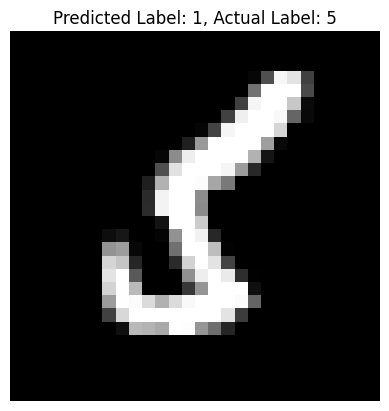

In [43]:
import random
import matplotlib.pyplot as plt

# Get a random index for the test data
random_index = random.randint(0, len(test_dataset) - 1)

# Get the image and label at the random index
image, label = test_dataset[random_index]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Assuming 'predictions' contains the predicted labels for the test data
predicted_label1 = predictions5[random_index]

# Display the image with both predicted and actual labels
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label1}, Actual Label: {label}')
plt.axis('off')
plt.show()


There are many combinations to experiment with amongst different optimizers, loss functions, dropout, and activation functions. So far we observed that there has been no drastic improvement in the performance of the network.